In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
text1 = 'She sells seashells by the seashore.'
text2 = '"Seashells! The seashells are on sale! By the seashore."'
text3 = 'She sells 3 seashells to John, who lives by the lake.'

In [4]:
words_lists = [text.split() for text in [text1, text2, text3]]
words1, words2, words3 = words_lists
for i, words in enumerate(words_lists, 1):
    print(f"Words in text {i}")
    print(f"{words}\n")

Words in text 1
['She', 'sells', 'seashells', 'by', 'the', 'seashore.']

Words in text 2
['"Seashells!', 'The', 'seashells', 'are', 'on', 'sale!', 'By', 'the', 'seashore."']

Words in text 3
['She', 'sells', '3', 'seashells', 'to', 'John,', 'who', 'lives', 'by', 'the', 'lake.']



In [5]:
def simplify_text(text):
    for punctuation in ['.', ',', '!', '?', '"']:
        text = text.replace(punctuation, '')
    return text.lower()
for i, words in enumerate(words_lists, 1):
    for j, word in enumerate(words):
        words[j] = simplify_text(word)
        print(f"Words in text {i}")
        print(f"{words}\n")

Words in text 1
['she', 'sells', 'seashells', 'by', 'the', 'seashore.']

Words in text 1
['she', 'sells', 'seashells', 'by', 'the', 'seashore.']

Words in text 1
['she', 'sells', 'seashells', 'by', 'the', 'seashore.']

Words in text 1
['she', 'sells', 'seashells', 'by', 'the', 'seashore.']

Words in text 1
['she', 'sells', 'seashells', 'by', 'the', 'seashore.']

Words in text 1
['she', 'sells', 'seashells', 'by', 'the', 'seashore']

Words in text 2
['seashells', 'The', 'seashells', 'are', 'on', 'sale!', 'By', 'the', 'seashore."']

Words in text 2
['seashells', 'the', 'seashells', 'are', 'on', 'sale!', 'By', 'the', 'seashore."']

Words in text 2
['seashells', 'the', 'seashells', 'are', 'on', 'sale!', 'By', 'the', 'seashore."']

Words in text 2
['seashells', 'the', 'seashells', 'are', 'on', 'sale!', 'By', 'the', 'seashore."']

Words in text 2
['seashells', 'the', 'seashells', 'are', 'on', 'sale!', 'By', 'the', 'seashore."']

Words in text 2
['seashells', 'the', 'seashells', 'are', 'on', 

In [6]:
words_sets = [set(words) for words in words_lists]
for i, unique_words in enumerate(words_sets, 1):
    print(f"Unique Words in text {i}")
    print(f"{unique_words}\n")

Unique Words in text 1
{'she', 'sells', 'the', 'by', 'seashells', 'seashore'}

Unique Words in text 2
{'are', 'on', 'the', 'by', 'sale', 'seashells', 'seashore'}

Unique Words in text 3
{'3', 'to', 'she', 'sells', 'lives', 'who', 'the', 'lake', 'by', 'seashells', 'john'}



In [7]:
words_set1 = words_sets[0]
for i, words in enumerate(words_sets[1:], 2):
    shared_words = words_set1.intersection(words)
    print(f"Texts 1 and {i} share these {len(shared_words)} words:")
    print(f"{shared_words}\n")

Texts 1 and 2 share these 4 words:
{'the', 'seashells', 'by', 'seashore'}

Texts 1 and 3 share these 5 words:
{'she', 'sells', 'the', 'by', 'seashells'}



In [8]:
for i, words_set in enumerate(words_sets[1:], 2):
    diverging_words = words_set1 ^ words_set
    print(f"Texts 1 and {i} don't share these {len(diverging_words)} words:")
    print(f"{diverging_words}\n")

Texts 1 and 2 don't share these 5 words:
{'she', 'sells', 'sale', 'are', 'on'}

Texts 1 and 3 don't share these 7 words:
{'3', 'to', 'lives', 'who', 'lake', 'john', 'seashore'}



In [9]:
for i, words_set in enumerate(words_sets[1:], 2):
    total_words = words_set1 | words_set
    print(f"Together, texts 1 and {i} contain {len(total_words)} nique words. These words are:\n {total_words}\n")

Together, texts 1 and 2 contain 9 nique words. These words are:
 {'are', 'on', 'she', 'sells', 'the', 'by', 'sale', 'seashells', 'seashore'}

Together, texts 1 and 3 contain 12 nique words. These words are:
 {'she', 'sells', 'lives', 'who', 'the', 'seashells', '3', 'to', 'lake', 'by', 'john', 'seashore'}



In [10]:
for i, words_set in enumerate(words_sets[1:], 2):
    shared_words = words_set1 & words_set
    diverging_words = words_set1 ^ words_set
    total_words = words_set1 | words_set
    assert len(total_words) == len(shared_words) + len(diverging_words)
    percent_shared = 100 * len(shared_words) / len(total_words)
    percent_diverging = 100 * len(diverging_words) / len(total_words)
    print(f"Together, texts 1 and {i} contain {len(total_words)} "
f"unique words. \n{percent_shared:.2f}% of these words are "
f"shared. \n{percent_diverging:.2f}% of these words diverge.\n")

Together, texts 1 and 2 contain 9 unique words. 
44.44% of these words are shared. 
55.56% of these words diverge.

Together, texts 1 and 3 contain 12 unique words. 
41.67% of these words are shared. 
58.33% of these words diverge.



In [11]:
def jaccard_similarity(text_a, text_b):
    word_set_a, word_set_b = [set(simplify_text(text).split()) for text in [text_a, text_b]]
    num_shared = len(word_set_a & word_set_b)
    num_total = len(word_set_a | word_set_b)
    return num_shared / num_total
for text in [text2, text3]:
    similarity = jaccard_similarity(text1, text)
    print(f"The Jaccard similarity between '{text1}' and '{text}' "
    f"equals {similarity:.4f}." "\n")

The Jaccard similarity between 'She sells seashells by the seashore.' and '"Seashells! The seashells are on sale! By the seashore."' equals 0.4444.

The Jaccard similarity between 'She sells seashells by the seashore.' and 'She sells 3 seashells to John, who lives by the lake.' equals 0.4167.



In [12]:
def jaccard_similarity_efficient(text_a, text_b):
    word_set_a, word_set_b = [set(simplify_text(text).split()) for text in [text_a, text_b]]
    num_shared = len(word_set_a & word_set_b)
    num_total = len(word_set_a) + len(word_set_b) - num_shared
    return num_shared / num_total
for text in [text2, text3]:
    similarity = jaccard_similarity_efficient(text1, text)
    assert similarity == jaccard_similarity(text1, text)

In [13]:
words_set1, words_set2, words_set3 = words_sets
total_words = words_set1 | words_set2 | words_set3
vocabulary = {word : i for i, word in enumerate(total_words)}
value_to_word = {value: word for word, value in vocabulary.items()}
print(f"Our vocabulary contains {len(vocabulary)} words. "
f"This vocabulary is:\n{vocabulary}")

Our vocabulary contains 15 words. This vocabulary is:
{'she': 0, 'sells': 1, 'lives': 2, 'who': 3, 'the': 4, 'sale': 5, 'seashells': 6, 'are': 7, '3': 8, 'to': 9, 'lake': 10, 'by': 11, 'on': 12, 'john': 13, 'seashore': 14}


In [14]:
import seaborn as sns

In [15]:
vectors = []
for i, words_set in enumerate(words_sets, 1):
    vector = np.array([0] * len(vocabulary))
    for word in words_set:
        vector[vocabulary[word]] = 1
    vectors.append(vector)

In [16]:
vectors

[array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1]),
 array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1]),
 array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0])]

(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Text 1'), Text(0, 1.5, 'Text 2'), Text(0, 2.5, 'Text 3')])

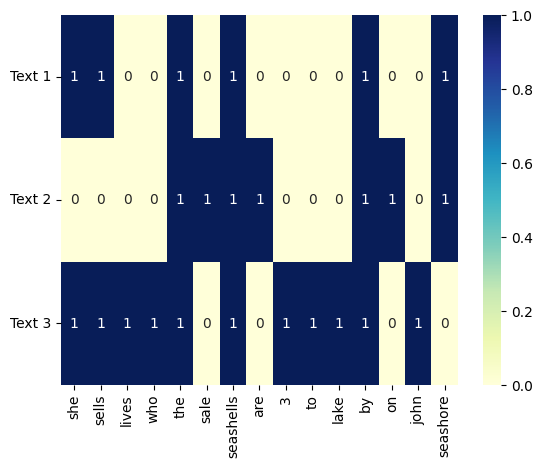

In [17]:
sns.heatmap(vectors, annot=True, cmap='YlGnBu', xticklabels=vocabulary.keys(), yticklabels=['Text 1', 'Text 2', 'Text 3'])
plt.yticks(rotation=0)

In [18]:
vector1, vector2 = vectors[:2]
for i in range(len(vocabulary)):
    if vector1[i] * vector2[i]:
        shared_word = value_to_word[i]
        print(f"'{shared_word}' is present in both texts 1 and 2")

'the' is present in both texts 1 and 2
'seashells' is present in both texts 1 and 2
'by' is present in both texts 1 and 2
'seashore' is present in both texts 1 and 2


In [19]:
shared_word_count = sum(vector1[i] * vector2[i] for i in range(len(vocabulary)))
assert shared_word_count == len(words_set1 & words_set2)

In [20]:
assert vector1.dot(vector2) == shared_word_count

In [21]:
assert vector1 @ vector2 == shared_word_count

In [22]:
def tanimoto_similarity(vector_a, vector_b):
    num_shared = vector_a @ vector_b
    num_total = vector_a @ vector_a + vector_b @ vector_b - num_shared
    return num_shared / num_total
for i, text in enumerate([text2, text3], 1):
    similarity = tanimoto_similarity(vector1, vectors[i])
    assert similarity == jaccard_similarity(text1, text)

In [23]:
similarity = tanimoto_similarity(np.array([61, 2]), np.array([1, 71]))

In [24]:
f"The similarity between texts is approximately {similarity:.3f}"

'The similarity between texts is approximately 0.024'

In [25]:
tf_vectors = []

In [26]:
for i, words_list in enumerate(words_lists, 1):
    tf_vector = np.array([0]*len(vocabulary))
    for word in words_list:
        word_index = vocabulary[word]
        tf_vector[word_index]+=1
    tf_vectors.append(tf_vector)

(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Text 1'), Text(0, 1.5, 'Text 2'), Text(0, 2.5, 'Text 3')])

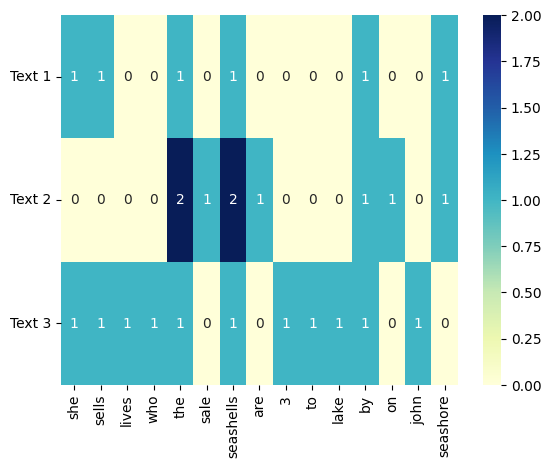

In [27]:
sns.heatmap(tf_vectors, annot=True, cmap='YlGnBu', xticklabels=vocabulary.keys(), yticklabels=['Text 1', 'Text 2', 'Text 3'])
plt.yticks(rotation=0)

In [28]:
tf_vector1 = tf_vectors[0]
binary_vector1 = vectors[0]
for i, tf_vector in enumerate(tf_vectors[1:], 2):
    similarity = tanimoto_similarity(tf_vector1, tf_vector)
    old_similarity = tanimoto_similarity(binary_vector1, vectors[i - 1])
    print(f"The recomputed Tanimoto similarity between texts 1 and {i} is"
    f" {similarity:.4f}.")
    print(f"Previously, that similarity equaled {old_similarity:.4f} " "\n")

The recomputed Tanimoto similarity between texts 1 and 2 is 0.4615.
Previously, that similarity equaled 0.4444 

The recomputed Tanimoto similarity between texts 1 and 3 is 0.4167.
Previously, that similarity equaled 0.4167 



In [29]:
query_vector = np.array([1, 1])

In [30]:
title_a_vector = np.array([3,3])
title_b_vector = np.array([1,0])

In [31]:
titles = ["A: Pepperoni Pizza! Pepperoni Pizza! Pepperoni Pizza!", "B: Pepperoni"]
title_vectors = [title_a_vector, title_b_vector]

In [32]:
similarities = [tanimoto_similarity(query_vector, title_vector) for title_vector in title_vectors]

In [33]:
for index in sorted(range(len(titles)), key=lambda i: similarities[i], reverse=True):
    title = titles[index]
    similarity = similarities[index]
    print(f"'{title}' has a query similarity of {similarity:.4f}")

'B: Pepperoni' has a query similarity of 0.5000
'A: Pepperoni Pizza! Pepperoni Pizza! Pepperoni Pizza!' has a query similarity of 0.4286


In [34]:
assert np.array_equal(query_vector, title_a_vector / 3)
assert tanimoto_similarity(query_vector, title_a_vector / 3) == 1

Text(0, 0.5, 'Pizza')

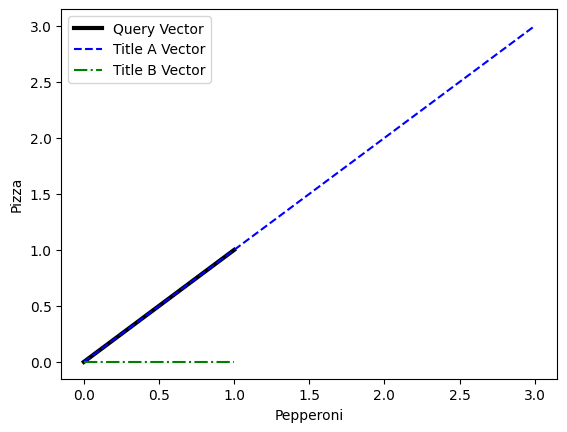

In [35]:
plt.plot([0, query_vector[0]], [0, query_vector[1]], label='Query Vector', linewidth=3, c='k')
plt.plot([0, title_a_vector[0]], [0, title_a_vector[1]], label='Title A Vector', linestyle='--', c='b')
plt.plot([0, title_b_vector[0]], [0, title_b_vector[1]], label='Title B Vector', linestyle='-.', c='g')
plt.legend()
plt.xlabel('Pepperoni')
plt.ylabel('Pizza')

In [36]:
from scipy.spatial.distance import euclidean
from numpy.linalg import norm

In [37]:
vector_names = ['Query Vector', 'Title A Vector', 'Title B Vector']
tf_search_vectors = [query_vector, title_a_vector, title_b_vector]
origin = np.array([0, 0])

In [38]:
for name, tf_vector in zip(vector_names, tf_search_vectors):
    magnitude = euclidean(tf_vector, origin)
    assert magnitude == norm(tf_vector)
    assert magnitude == (tf_vector @ tf_vector) ** .5
    print(f"{name}'s magnitude is approximately {magnitude:.4f}")
magnitude_ratio = norm(title_a_vector) / norm(query_vector)
print(f"\nVector A is {magnitude_ratio:.0f}x as long as Query Vector")

Query Vector's magnitude is approximately 1.4142
Title A Vector's magnitude is approximately 4.2426
Title B Vector's magnitude is approximately 1.0000

Vector A is 3x as long as Query Vector


In [39]:
unit_query_vector = query_vector / norm(query_vector)
unit_title_a_vector = title_a_vector / norm(title_a_vector)
assert np.allclose(unit_query_vector, unit_title_a_vector)
unit_title_b_vector = title_b_vector

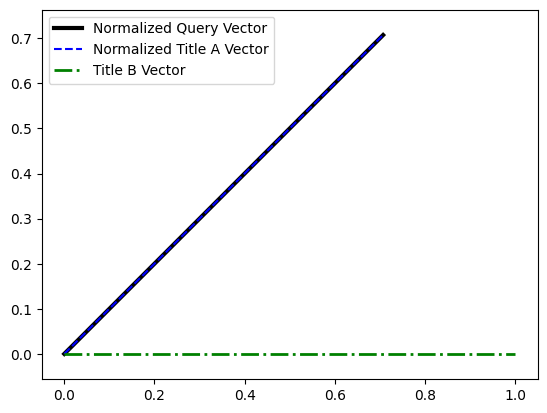

In [40]:
plt.plot([0, unit_query_vector[0]], [0, unit_query_vector[1]], c='k',
linewidth=3, label='Normalized Query Vector')
plt.plot([0, unit_title_a_vector[0]], [0, unit_title_a_vector[1]], c='b',
linestyle='--', label='Normalized Title A Vector')
plt.plot([0, unit_title_b_vector[0]], [0, unit_title_b_vector[1]], c='g',
linewidth=2, linestyle='-.', label='Title B Vector')
plt.axis('equal')
plt.legend()

In [41]:
unit_title_vectors = [unit_title_a_vector, unit_title_b_vector]
similarities = [tanimoto_similarity(unit_query_vector, unit_title_vector) for unit_title_vector in unit_title_vectors]
for index in sorted(range(len(titles)), key=lambda i: similarities[i], reverse=True):
    title = titles[index]
    similarity = similarities[index]
    print(f"'{title}' has a normalized query similarity of {similarity:.4f}")

'A: Pepperoni Pizza! Pepperoni Pizza! Pepperoni Pizza!' has a normalized query similarity of 1.0000
'B: Pepperoni' has a normalized query similarity of 0.5469


In [42]:
def normalized_tanimoto(u1, u2):
    dot_product = u1 @ u2
    return dot_product / (2 - dot_product)
for unit_title_vector in unit_title_vectors[1:]:
    similarity = normalized_tanimoto(unit_query_vector, unit_title_vector)
    assert similarity == tanimoto_similarity(unit_query_vector, unit_title_vector)

In [43]:
unit_vector_names = ['Normalized Title A vector', 'Title B Vector']
u1 = unit_query_vector
for unit_vector_name, u2 in zip(unit_vector_names, unit_title_vectors):
    similarity = normalized_tanimoto(u1, u2)
    cosine_similarity = 2 * similarity / (1 + similarity)
    assert cosine_similarity == u1 @ u2
    angle = np.arccos(cosine_similarity)
    euclidean_distance = (2 - 2 * cosine_similarity) ** 0.5
    assert round(euclidean_distance, 10) == round(euclidean(u1, u2), 10)
    measurements = {'Tanimoto similarity': similarity,
    'cosine similarity': cosine_similarity,
    'Euclidean distance': euclidean_distance,
    'angle': np.degrees(angle)}
    print("We are comparing Normalized Query Vector and "
    f"{unit_vector_name}")
    for measurement_type, value in measurements.items():
        output = f"The {measurement_type} between vectors is {value:.4f}"
        if measurement_type == 'angle':
            output += ' degrees\n'
        print(output)

We are comparing Normalized Query Vector and Normalized Title A vector
The Tanimoto similarity between vectors is 1.0000
The cosine similarity between vectors is 1.0000
The Euclidean distance between vectors is 0.0000
The angle between vectors is 0.0000 degrees

We are comparing Normalized Query Vector and Title B Vector
The Tanimoto similarity between vectors is 0.5469
The cosine similarity between vectors is 0.7071
The Euclidean distance between vectors is 0.7654
The angle between vectors is 45.0000 degrees



In [44]:
num_texts = len(tf_vectors)

In [45]:
num_texts

3

In [46]:
similarities = np.zeros((num_texts, num_texts))

In [47]:
unit_vectors = np.array([vector / norm(vector) for vector in tf_vectors])

In [48]:
for i, vector_a in enumerate(unit_vectors):
    for j, vector_b in enumerate(unit_vectors):
        similarities[i, j] = normalized_tanimoto(vector_a, vector_b)

(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Text 1'), Text(0, 1.5, 'Text 2'), Text(0, 2.5, 'Text 3')])

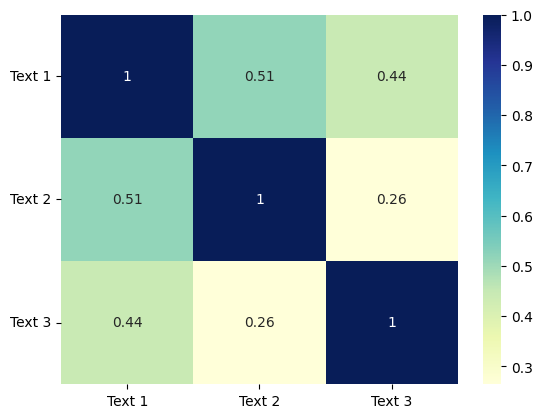

In [49]:
labels = ['Text 1', 'Text 2', 'Text 3']
sns.heatmap(similarities, annot=True, cmap='YlGnBu', xticklabels=labels, yticklabels=labels)
plt.yticks(rotation=0)

In [50]:
matrices = [unit_vectors, pd.DataFrame(unit_vectors)]

In [52]:
matrix_types = ['2D Numpy array', 'Pandas Dataframe']

In [53]:
for matrix_type, matrix in zip(matrix_types, matrices):
    row_count, column_count = matrix.shape
    print(f"Our {matrix_type} contains {row_count} rows and {column_count} columns")
    assert (column_count, row_count) == matrix.T.shape

Our 2D Numpy array contains 3 rows and 15 columns
Our Pandas Dataframe contains 3 rows and 15 columns


In [54]:
double_similarities = 2 * similarities

In [55]:
double_similarities

array([[2.        , 1.02884877, 0.88904087],
       [1.02884877, 2.        , 0.52863842],
       [0.88904087, 0.52863842, 2.        ]])

In [56]:
zero_matrix = np.zeros_like(similarities)

In [57]:
zero_matrix

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [58]:
negitive_1_matrix = zero_matrix - 1

In [59]:
negitive_1_matrix

array([[-1., -1., -1.],
       [-1., -1., -1.],
       [-1., -1., -1.]])

In [60]:
similarities

array([[1.        , 0.51442439, 0.44452044],
       [0.51442439, 1.        , 0.26431921],
       [0.44452044, 0.26431921, 1.        ]])

In [61]:
cosine_similarities = 2 * similarities / (1 + similarities)
for i in range(similarities.shape[0]):
    for j in range(similarities.shape[1]):
        cosine_sim = unit_vectors[i] @ unit_vectors[j]
        assert round(cosine_similarities[i][j], 15) == round(cosine_sim, 15)

In [62]:
for name, matrix in [('Similarities', similarities), ('Unit Vectors', unit_vectors)]:
    print(f"Accessing rows and columns in the {name} Matrix.")
    row, column = matrix[0], matrix[:,0]
    print(f"Row at index 0 is:\n{row}")
    print(f"\nColumn at index 0 is:\n{column}\n")

Accessing rows and columns in the Similarities Matrix.
Row at index 0 is:
[1.         0.51442439 0.44452044]

Column at index 0 is:
[1.         0.51442439 0.44452044]

Accessing rows and columns in the Unit Vectors Matrix.
Row at index 0 is:
[0.40824829 0.40824829 0.         0.         0.40824829 0.
 0.40824829 0.         0.         0.         0.         0.40824829
 0.         0.         0.40824829]

Column at index 0 is:
[0.40824829 0.         0.30151134]



In [63]:
unit_vectors

array([[0.40824829, 0.40824829, 0.        , 0.        , 0.40824829,
        0.        , 0.40824829, 0.        , 0.        , 0.        ,
        0.        , 0.40824829, 0.        , 0.        , 0.40824829],
       [0.        , 0.        , 0.        , 0.        , 0.5547002 ,
        0.2773501 , 0.5547002 , 0.2773501 , 0.        , 0.        ,
        0.        , 0.2773501 , 0.2773501 , 0.        , 0.2773501 ],
       [0.30151134, 0.30151134, 0.30151134, 0.30151134, 0.30151134,
        0.        , 0.30151134, 0.        , 0.30151134, 0.30151134,
        0.30151134, 0.30151134, 0.        , 0.30151134, 0.        ]])

In [64]:
row = similarities[0]
column = unit_vectors[:, 0]

In [65]:
row @ column

0.5422762446156452

In [66]:
num_rows = similarities.shape[0]
num_columns = unit_vectors.shape[1]
for i in range(num_rows):
    for j in range(num_columns):
        row = similarities[i]
        column = unit_vectors[:,j]
        dot_product = row @ column
        print(f"The dot product between row {i} column {j} is: " f"{dot_product:.4f}")

The dot product between row 0 column 0 is: 0.5423
The dot product between row 0 column 1 is: 0.5423
The dot product between row 0 column 2 is: 0.1340
The dot product between row 0 column 3 is: 0.1340
The dot product between row 0 column 4 is: 0.8276
The dot product between row 0 column 5 is: 0.1427
The dot product between row 0 column 6 is: 0.8276
The dot product between row 0 column 7 is: 0.1427
The dot product between row 0 column 8 is: 0.1340
The dot product between row 0 column 9 is: 0.1340
The dot product between row 0 column 10 is: 0.1340
The dot product between row 0 column 11 is: 0.6850
The dot product between row 0 column 12 is: 0.1427
The dot product between row 0 column 13 is: 0.1340
The dot product between row 0 column 14 is: 0.5509
The dot product between row 1 column 0 is: 0.2897
The dot product between row 1 column 1 is: 0.2897
The dot product between row 1 column 2 is: 0.0797
The dot product between row 1 column 3 is: 0.0797
The dot product between row 1 column 4 is: 0.

In [67]:
unit_vectors.shape

(3, 15)

In [68]:
dot_products = np.zeros((num_rows, num_columns))
for i in range(num_rows):
    for j in range(num_columns):
        dot_products[i][j] = similarities[i] @ unit_vectors[:,j]
        print(dot_products)

[[0.54227624 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]
[[0.54227624 0.54227624 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]
[[0.54227624 0.54227624 0.13402795 0.         0.         0.
  

In [69]:
matrix_product = similarities @ unit_vectors
assert np.allclose(matrix_product, dot_products)